In [11]:
%run 'Plot Prep.ipynb'

What do you want to minimize?
Type 1 for session length, 2 for frequency, 3 for time until results, 4 for all: 4


<IPython.core.display.Javascript object>


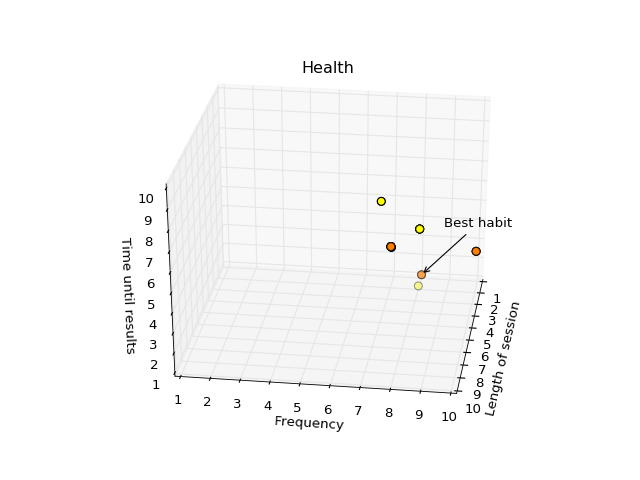

In [12]:
%matplotlib inline
%matplotlib nbagg
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

FLOOR = 1
CEILING = 10
print 'What do you want to minimize?'
goal = 5
while goal > 4:
    goal = int(raw_input('Type 1 for session length, 2 for frequency, 3 for time until results, 4 for all: '))
# Set up formatting for the movie files
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800)

class AnimatedScatter(object):
    def __init__(self):
        self.angle = 0
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111,projection = '3d')
        # Create animation object
        self.ani = animation.FuncAnimation(self.fig, self.update,
                        interval=200, init_func=self.setup_plot,
            frames=len(health_color), repeat_delay=100, blit=True)
        # The following line is used for saving the animation.
        # self.ani.save('health_all.mp4', writer=writer)
    # Create initial frame
    def setup_plot(self):
        self.ax.set_xlim3d(FLOOR, CEILING)
        self.ax.set_ylim3d(FLOOR, CEILING)
        self.ax.set_zlim3d(FLOOR, CEILING)
        self.ax.set_xlabel('Length of session')
        self.ax.set_ylabel('Frequency')
        self.ax.set_zlabel('Time until results')
        self.ax.set_title('Health')
        self.scat = self.ax.scatter(health_session_length[:0],
                        health_frequency[:0],
                        health_time_to_result[:0],
                        s=50, c = health_color[:0])
        self.annotation = self.ax.annotate('', xy = (0, 0), xytext = (20, 40))
        return self.scat, self.annotation
    
    # Create new frames
    def update(self, i):
        self.angle = (self.angle + 1)%360
        self.ax.view_init(30,self.angle)
        self.scat = self.ax.scatter(health_session_length[:i],
                        health_frequency[:i],
                        health_time_to_result[:i],
                        s=50, c = health_color[:i])
        if goal == 1:
            score = np.array(health_session_length[:i])/ np.array(health_score[:i])
        if goal == 2:
            score = np.array(health_frequency[:i]) / np.array(health_score[:i]) 
        if goal == 3:
            score = np.array(health_time_to_result[:i]) / np.array(health_score[:i]) 
        if goal == 4:
            score = np.array(health_session_length[:i]) * np.array(health_frequency[:i]) * np.array(health_time_to_result[:i]) / np.array(health_score[:i]) 
        if score != []:
            j = np.argmin(score)
            x, y, _ = proj3d.proj_transform(health_session_length[j],
                                    health_frequency[j], health_time_to_result[j], self.ax.get_proj())
            # Remove previous annotations
            self.annotation.remove()
            # Making a new annotation
            self.annotation = self.ax.annotate("Best habit", xy = (x, y), xytext = (20, 40), 
                                textcoords = 'offset points', ha = 'left', va = 'bottom',
                                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        return self.scat, self.annotation

    def show(self):
        plt.show()

if __name__ == '__main__':
    a = AnimatedScatter()
    a.show()

What do you want to minimize?
Type 1 for session length, 2 for frequency, 3 for time until results, 4 for all: 4


<IPython.core.display.Javascript object>


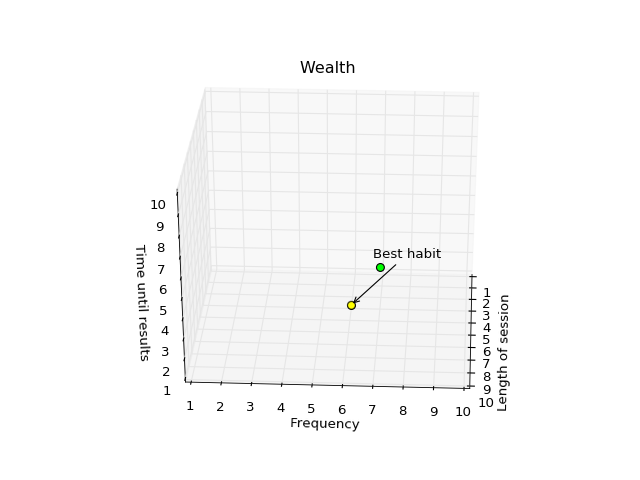

In [13]:
print 'What do you want to minimize?'
goal = 5
while goal > 4:
    goal = int(raw_input('Type 1 for session length, 2 for frequency, 3 for time until results, 4 for all: '))

class AnimatedScatter(object):
    def __init__(self):
        self.angle = 0
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111,projection = '3d')
        self.ani = animation.FuncAnimation(self.fig, self.update,
                        interval=300, init_func=self.setup_plot,
            frames=len(wealth_color), repeat_delay=100, blit=True)
        # self.ani.save('wealth_all.mp4', writer=writer)

    def setup_plot(self):
        self.ax.set_xlim3d(FLOOR, CEILING)
        self.ax.set_ylim3d(FLOOR, CEILING)
        self.ax.set_zlim3d(FLOOR, CEILING)
        self.ax.set_xlabel('Length of session')
        self.ax.set_ylabel('Frequency')
        self.ax.set_zlabel('Time until results')
        self.ax.set_title('Wealth')
        self.scat = self.ax.scatter(wealth_session_length[:0],
                        wealth_frequency[:0],
                        wealth_time_to_result[:0],
                        s=50, c = wealth_color[:0])
        self.annotation = self.ax.annotate('', xy = (0, 0), xytext = (20, 40))
        return self.scat, self.annotation

    def update(self, i):
        self.angle = (self.angle + 1)%360
        self.ax.view_init(30,self.angle)
        self.scat = self.ax.scatter(wealth_session_length[:i],
                        wealth_frequency[:i],
                        wealth_time_to_result[:i],
                        s=50, c = wealth_color[:i])
        if goal == 1:
            score = np.array(wealth_session_length[:i])/ np.array(wealth_score[:i])
        if goal == 2:
            score = np.array(wealth_frequency[:i]) / np.array(wealth_score[:i]) 
        if goal == 3:
            score = np.array(wealth_time_to_result[:i]) / np.array(wealth_score[:i]) 
        if goal == 4:
            score = np.array(wealth_session_length[:i]) * np.array(wealth_frequency[:i]) * np.array(wealth_time_to_result[:i]) / np.array(wealth_score[:i]) 
        if score != []:
            j = np.argmin(score)
            x, y, _ = proj3d.proj_transform(wealth_session_length[j],
                                    wealth_frequency[j], wealth_time_to_result[j], self.ax.get_proj())
            self.annotation.remove()
            self.annotation = self.ax.annotate("Best habit", xy = (x, y), xytext = (20, 40), 
                                textcoords = 'offset points', ha = 'left', va = 'bottom',
                                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        return self.scat, self.annotation

    def show(self):
        plt.show()

if __name__ == '__main__':
    a = AnimatedScatter()
    a.show()

What do you want to minimize?
Type 1 for session length, 2 for frequency, 3 for time until results, 4 for all: 4


<IPython.core.display.Javascript object>


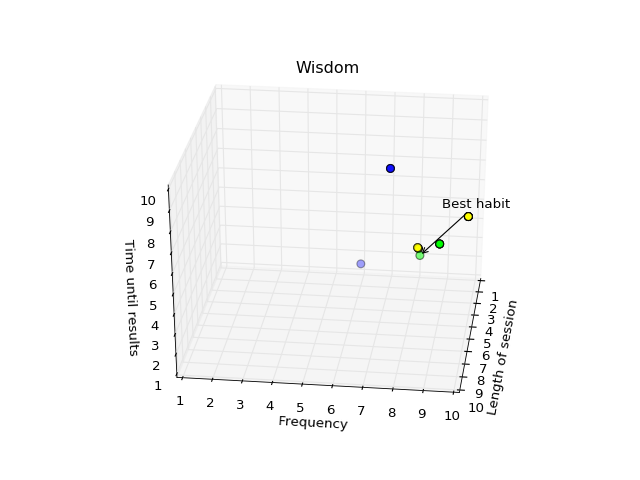

In [15]:
FLOOR = 1
CEILING = 10
print 'What do you want to minimize?'
goal = 5
while goal > 4:
    goal = int(raw_input('Type 1 for session length, 2 for frequency, 3 for time until results, 4 for all: '))

class AnimatedScatter(object):
    def __init__(self):
        self.angle = 0
        self.fig = plt.figure()
        self.ax = self.fig.add_subplot(111,projection = '3d')
        self.ani = animation.FuncAnimation(self.fig, self.update,
                        interval=200, init_func=self.setup_plot,
            frames=len(wisdom_color), repeat_delay=100, blit=True)
        
        # self.ani.save('wisdom_all.mp4', writer=writer)

    def setup_plot(self):
        self.ax.set_xlim3d(FLOOR, CEILING)
        self.ax.set_ylim3d(FLOOR, CEILING)
        self.ax.set_zlim3d(FLOOR, CEILING)
        self.ax.set_xlabel('Length of session')
        self.ax.set_ylabel('Frequency')
        self.ax.set_zlabel('Time until results')
        self.ax.set_title('Wisdom')
        self.scat = self.ax.scatter(wisdom_session_length[:0],
                        wisdom_frequency[:0],
                        wisdom_time_to_result[:0],
                        s=50, c = wisdom_color[:0])
        self.annotation = self.ax.annotate('', xy = (0, 0), xytext = (20, 40))
        return self.scat, self.annotation

    def update(self, i):
        self.angle = (self.angle + 1)%360
        self.ax.view_init(30,self.angle)
        self.scat = self.ax.scatter(wisdom_session_length[:i],
                        wisdom_frequency[:i],
                        wisdom_time_to_result[:i],
                        s=50, c = wisdom_color[:i])
        if goal == 1:
            score = np.array(wisdom_session_length[:i])/ np.array(wisdom_score[:i])
        if goal == 2:
            score = np.array(wisdom_frequency[:i]) / np.array(wisdom_score[:i]) 
        if goal == 3:
            score = np.array(wisdom_time_to_result[:i]) / np.array(wisdom_score[:i]) 
        if goal == 4:
            score = np.array(wisdom_session_length[:i]) * np.array(wisdom_frequency[:i]) * np.array(wisdom_time_to_result[:i]) / np.array(wisdom_score[:i]) 
        if score != []:
            j = np.argmin(score)
            x, y, _ = proj3d.proj_transform(wisdom_session_length[j],
                                    wisdom_frequency[j], wisdom_time_to_result[j], self.ax.get_proj())
            self.annotation.remove()
            self.annotation = self.ax.annotate("Best habit", xy = (x, y), xytext = (20, 40), 
                                textcoords = 'offset points', ha = 'left', va = 'bottom',
                                arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
        return self.scat, self.annotation

    def show(self):
        plt.show()

if __name__ == '__main__':
    a = AnimatedScatter()
    a.show()

In [19]:
# Create data frames for pairplots
import pandas
 
data_health = pandas.DataFrame({'Session length': health_session_length,
                                'Frequency': health_frequency,
                                'Time until results': health_time_to_result,
                                'Score': health_score})  

data_wealth = pandas.DataFrame({'Session length': wealth_session_length,
                                'Frequency': wealth_frequency,
                                'Time until results': wealth_time_to_result,
                                'Score': wealth_score})  

data_wisdom = pandas.DataFrame({'Session length': wisdom_session_length,
                                'Frequency': wisdom_frequency,
                                'Time until results': wisdom_time_to_result,
                                'Score': wisdom_score})  

<IPython.core.display.Javascript object>


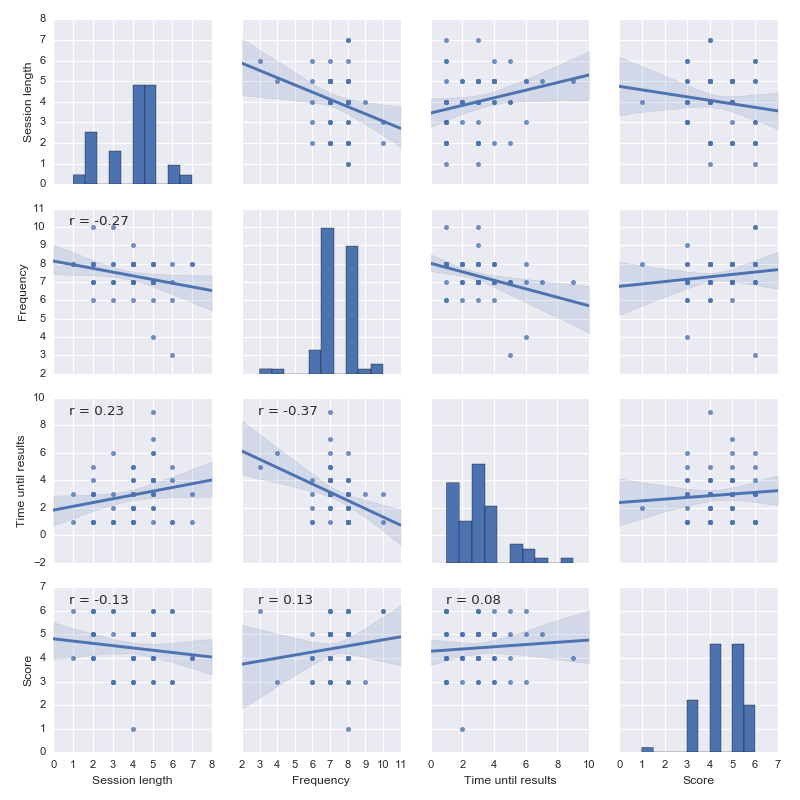

<IPython.core.display.Javascript object>


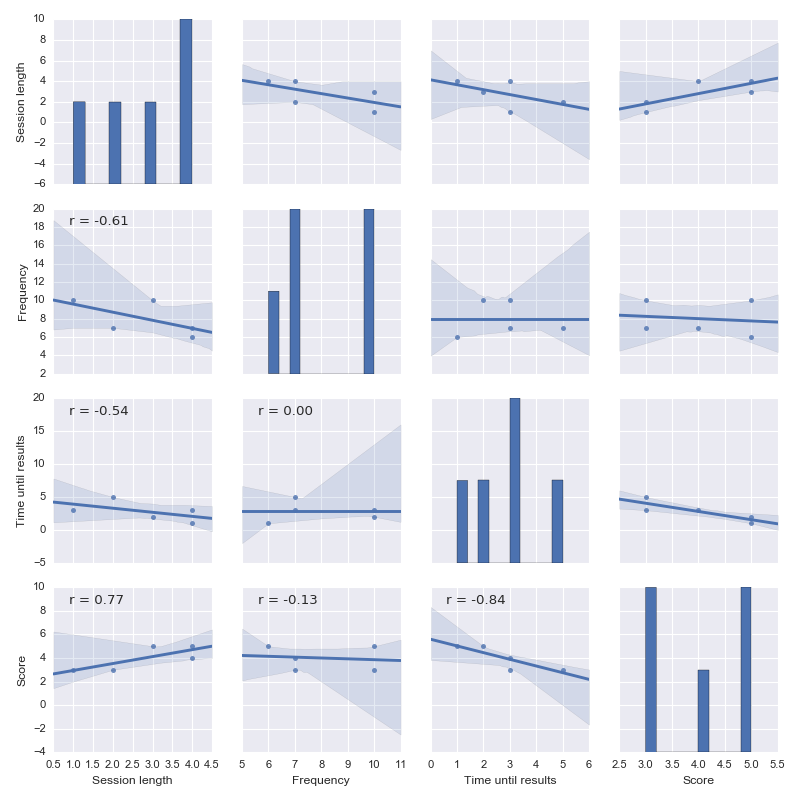

<IPython.core.display.Javascript object>


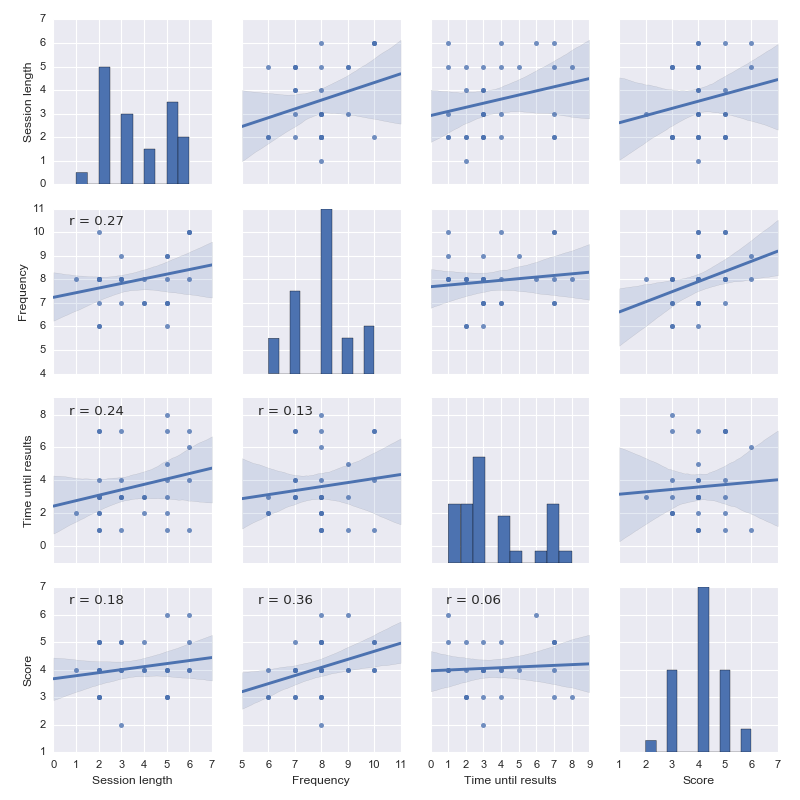

In [20]:
import seaborn
from scipy import stats
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

f1 = seaborn.pairplot(data_health, vars=['Session length', 'Frequency', 'Time until results', 'Score'], kind='reg') 
f1.map_lower(corrfunc)

f2 = seaborn.pairplot(data_wealth, vars=['Session length', 'Frequency', 'Time until results', 'Score'], kind='reg') 
f2.map_lower(corrfunc)

f3 = seaborn.pairplot(data_wisdom, vars=['Session length', 'Frequency', 'Time until results', 'Score'], kind='reg') 
f3.map_lower(corrfunc)